# Outlier Users
In this notebook we will analyse outliers in the dataset. These come in various shapes and forms. We will look at 3 types of outliers. 
1) Those with negative *xp*.
2) Those with very high *xp*.
3) Those whose character is neither *male* nor *female*.

### Load data

In [1]:
import utilities.data as ud
import utilities.users as uu
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = "./data"

In [2]:
# Execute only if you want to fetch the data from the Database.
ud.fetch_data(DATA_DIR)

In [3]:
users, challenges, items, skills, tasks = ud.read_data(DATA_DIR)

# We are only interested in active users.
users = uu.process(uu.active(users))

### Analysis

First we will have a look at users with less than 0 xp points. The existence of such users suggests a bug in the system, possibly caused by a player unmarking a skill as complete.

In [4]:
users[users["xp"]<0]

,_id,xp,xpHistory,items,skillscompleted,skillsinprogress,challengescompleted,challengesinprogress,character,timezone,baselocation,lastTracked,numDaysTracked,reminderSent
4663,63e598ddb0f5c03625155c75,-60,[0],"[ObjectId('62c382d46cac02c487e243cb'), ObjectI...",[],"[ObjectId('62c226cf9efefadfd10e20ad'), ObjectI...",[],[],male,0.0,1054376021975113869,2023-02-15 03:32:30.211,6,1


Here is the data for the 0.1% top users.

In [5]:
top_users = users[users["xp"]>users["xp"].quantile(0.999)]
top_users

,_id,xp,xpHistory,items,skillscompleted,skillsinprogress,challengescompleted,challengesinprogress,character,timezone,baselocation,lastTracked,numDaysTracked,reminderSent
381,62c9e671c6fc4a6d588902dc,166390,"[0, 0, 2420, 11020, 16640, 27340, 38740, 43840...","[ObjectId('62c382d46cac02c487e243cb'), ObjectI...","[ObjectId('62c226cf9efefadfd10e20ad'), ObjectI...","[ObjectId('62c226d69efefadfd10e2167'), ObjectI...","[ObjectId('62c226d09efefadfd10e20bb'), ObjectI...",[],male,-4.0,953924192259170335,2023-04-01 09:26:19.637,149,1
406,62cbb64d17466f8557f81ee5,138860,"[0, 5190, 8840, 12340, 12340, 15940, 23640, 33...","[ObjectId('62c382d46cac02c487e243cb'), ObjectI...","[ObjectId('62c226cf9efefadfd10e20ad'), ObjectI...","[ObjectId('62c226d69efefadfd10e216e'), ObjectI...","[ObjectId('62c226d09efefadfd10e20bb'), ObjectI...",[],male,-8.0,333805141746515980,2023-06-10 22:16:02.511,364,-1
936,62f928203ab35244f0edb52b,214050,"[0, 0, 0, 560, 2660, 6110, 9130, 15480, 22480,...","[ObjectId('62c382d46cac02c487e243cb'), ObjectI...","[ObjectId('62c226cf9efefadfd10e20b2'), ObjectI...",[ObjectId('62c226d19efefadfd10e20d6')],"[ObjectId('62c226d09efefadfd10e20bb'), ObjectI...",[],male,0.0,975859572969455646,2023-06-11 18:36:20.631,234,-1
1403,62fec820f73481669ecc9eb1,137150,"[0, 0, 340, 1440, 6290, 10680, 13580, 14980, 2...","[ObjectId('62c382d46cac02c487e243cb'), ObjectI...","[ObjectId('62c226cf9efefadfd10e20b2'), ObjectI...",[],"[ObjectId('62c226df9efefadfd10e2242'), ObjectI...",[],male,-6.0,953924192259170335,2023-04-10 01:01:35.887,475,1


We will now calculate the coefficient of variation $C_v=\frac{\sigma}{\mu}$, for the top users. As a reminder, a higher value of $C_v$ corresponds to higher variation in the dataset. 

In [6]:
cv = uu.coeff_variation(top_users, "xp")
print(f"The coefficient of variation is {cv:.4f}")

The coefficient of variation is 0.2187


We will also calculate the coefficient of variation of the entire dataset. A high value (over 1) here indicates that the data is very spread out.

In [7]:
cv = uu.coeff_variation(users, "xp")
print(f"The coefficient of variation is {cv:.4f}")

The coefficient of variation is 3.5567


A good way to quantify exactly how extreme their *xp* level is in comparison to other active users is to look at how many *Standard deviations* they stray away from the mean. For refference, if the data was normally distributed, we'd expect 99.7% of the data to be within 3 standards deviations of the mean.

In [8]:
top_users = top_users.sort_values("xp", ascending=False)

j = 0

for i, user in top_users.iterrows():
    j += 1
    v = abs(user["xp"]-users["xp"].mean())/users["xp"].std()
    print(f"The user at poisition number {j} is {v:.3f} stds away from the mean.")

The user at poisition number 1 is 18.359 stds away from the mean.
The user at poisition number 2 is 14.208 stds away from the mean.
The user at poisition number 3 is 11.811 stds away from the mean.
The user at poisition number 4 is 11.662 stds away from the mean.


Another way to view the outliers in the dataset is to view the *xp* level and the number of days tracked. This lets us see two dimensions of outliers. Those who have been using SkillTree consistently for a very long time, and those who have high *xp*. It is also important to note that those users who have a high *xp* level and low number of tracked days are "intense users" in the sense that they have been able to progress enormously in a short amount of time.

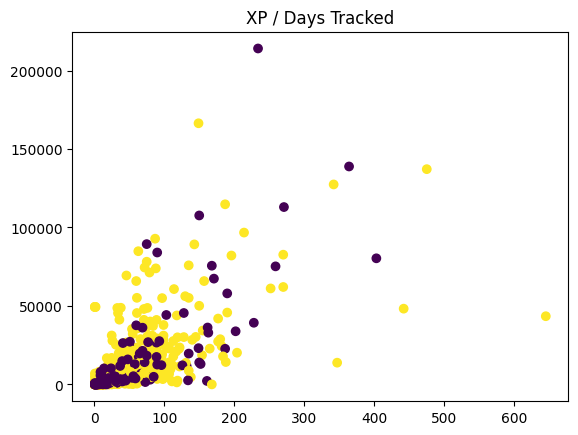

In [9]:
plt.title("XP / Days Tracked")
plt.scatter(users["numDaysTracked"], users["xp"], c=users["reminderSent"])

Finally we will look at the last type of outlier, the users who have the gender of the character set to neither male nor female.

In [10]:
users[(users["character"] != "male") & (users["character"] != "female")]

,_id,xp,xpHistory,items,skillscompleted,skillsinprogress,challengescompleted,challengesinprogress,character,timezone,baselocation,lastTracked,numDaysTracked,reminderSent
1495,6301810ef73481669ecd49a8,1900,"[0, 0, 500, 900, 900, 1600, 1900, 1900]","[ObjectId('62c226d09efefadfd10e20c6'), ObjectI...","[ObjectId('62c226cf9efefadfd10e20ad'), ObjectI...","[ObjectId('62c226d19efefadfd10e20d9'), ObjectI...",[],"[ObjectId('62c226df9efefadfd10e2242'), ObjectI...",ok,-6.0,497222488145788929,2022-09-29 21:57:05.492,31,1
